## Solutions to Selected Exercises

## Chapter 1

### Ex. 3: Implement Instagram-like Gotham Filter

255


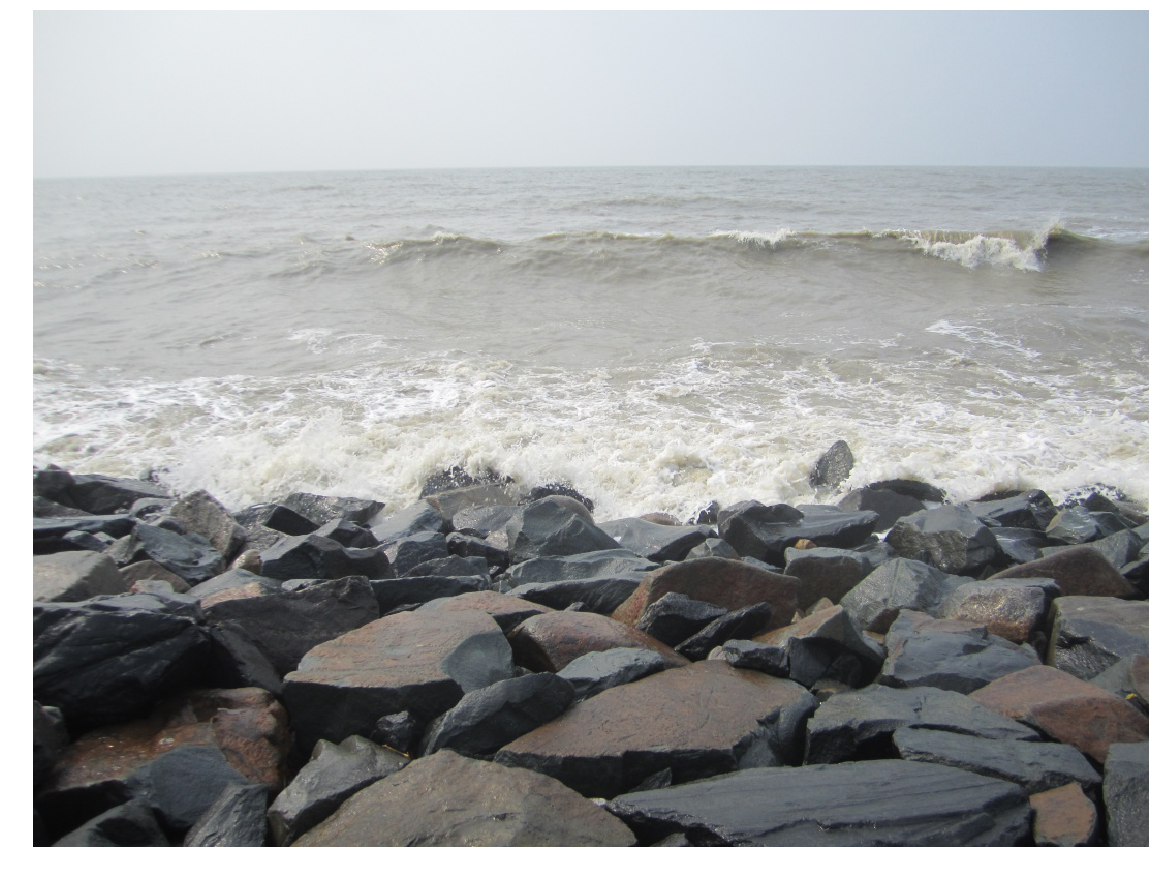

In [11]:
%matplotlib inline

from PIL import Image
import numpy as np
import matplotlib.pylab as plt

im = Image.open('images/sea.jpg') # assumed pixel values in [0,255]
print(np.max(im))
# 255
plt.figure(figsize=(20,20))
plt.imshow(im)
plt.axis('off')
plt.show()

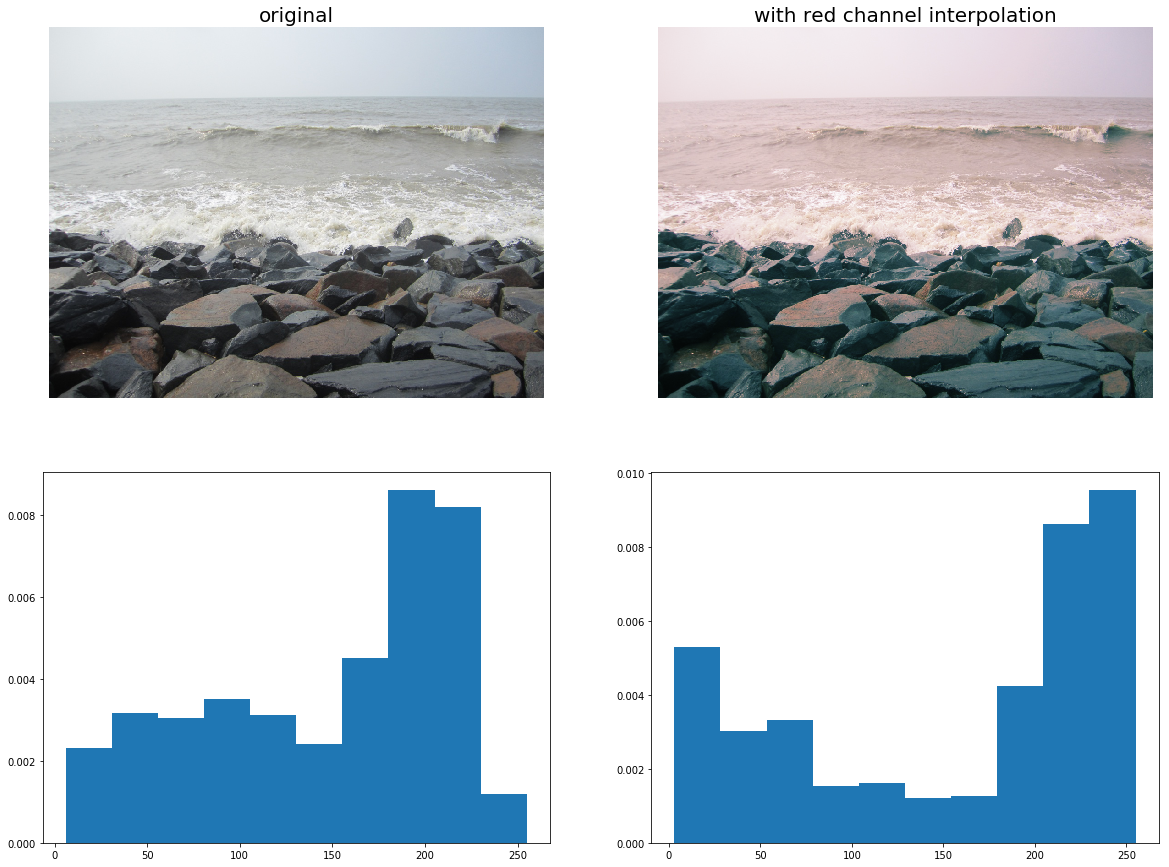

In [12]:
r, g, b = im.split() # split the channels
r_old = np.linspace(0,255,11)   # reference points
r_new = [0., 12.75, 25.5, 51., 76.5, 127.5, 178.5, 204., 229.5, 242.25, 255.] # new values at reference points

# strech the red channel histogram with interpolation and obtain new red channel values for each pixel                       
r1 = Image.fromarray((np.reshape(np.interp(np.array(r).ravel(), r_old, r_new),
                                 (im.height, im.width))).astype(np.uint8), mode='L')

plt.figure(figsize=(20,15))
plt.subplot(221)
plt.imshow(im)
plt.title('original', size=20)
plt.axis('off')
plt.subplot(222)
im1 = Image.merge('RGB', (r1, g, b))
plt.imshow(im1)
plt.axis('off')
plt.title('with red channel interpolation', size=20)
plt.subplot(223)
plt.hist(np.array(r).ravel(), normed=True)
plt.subplot(224)
plt.hist(np.array(r1).ravel(), normed=True)
plt.show()

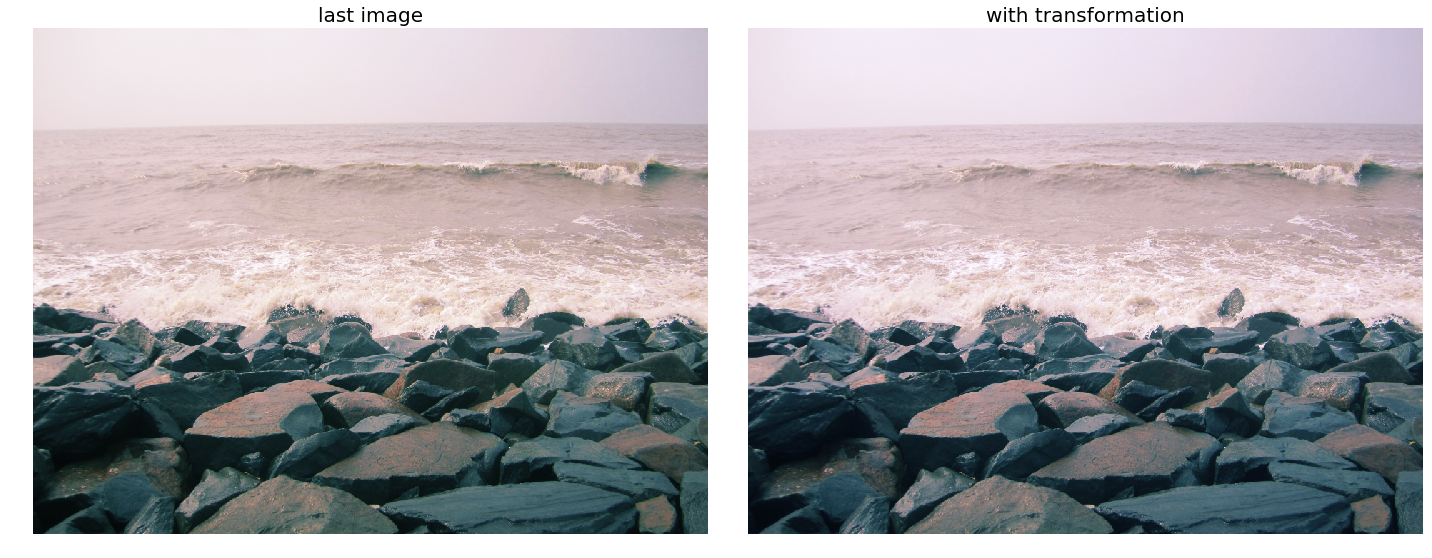

In [13]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(im1)
plt.title('last image', size=20)
plt.axis('off')
b1 = Image.fromarray(np.clip(np.array(b) + 7.65, 0, 255).astype(np.uint8))
im1 = Image.merge('RGB', (r1, g, b1))
plt.subplot(122)
plt.imshow(im1)
plt.axis('off')
plt.title('with transformation', size=20)
plt.tight_layout()
plt.show()

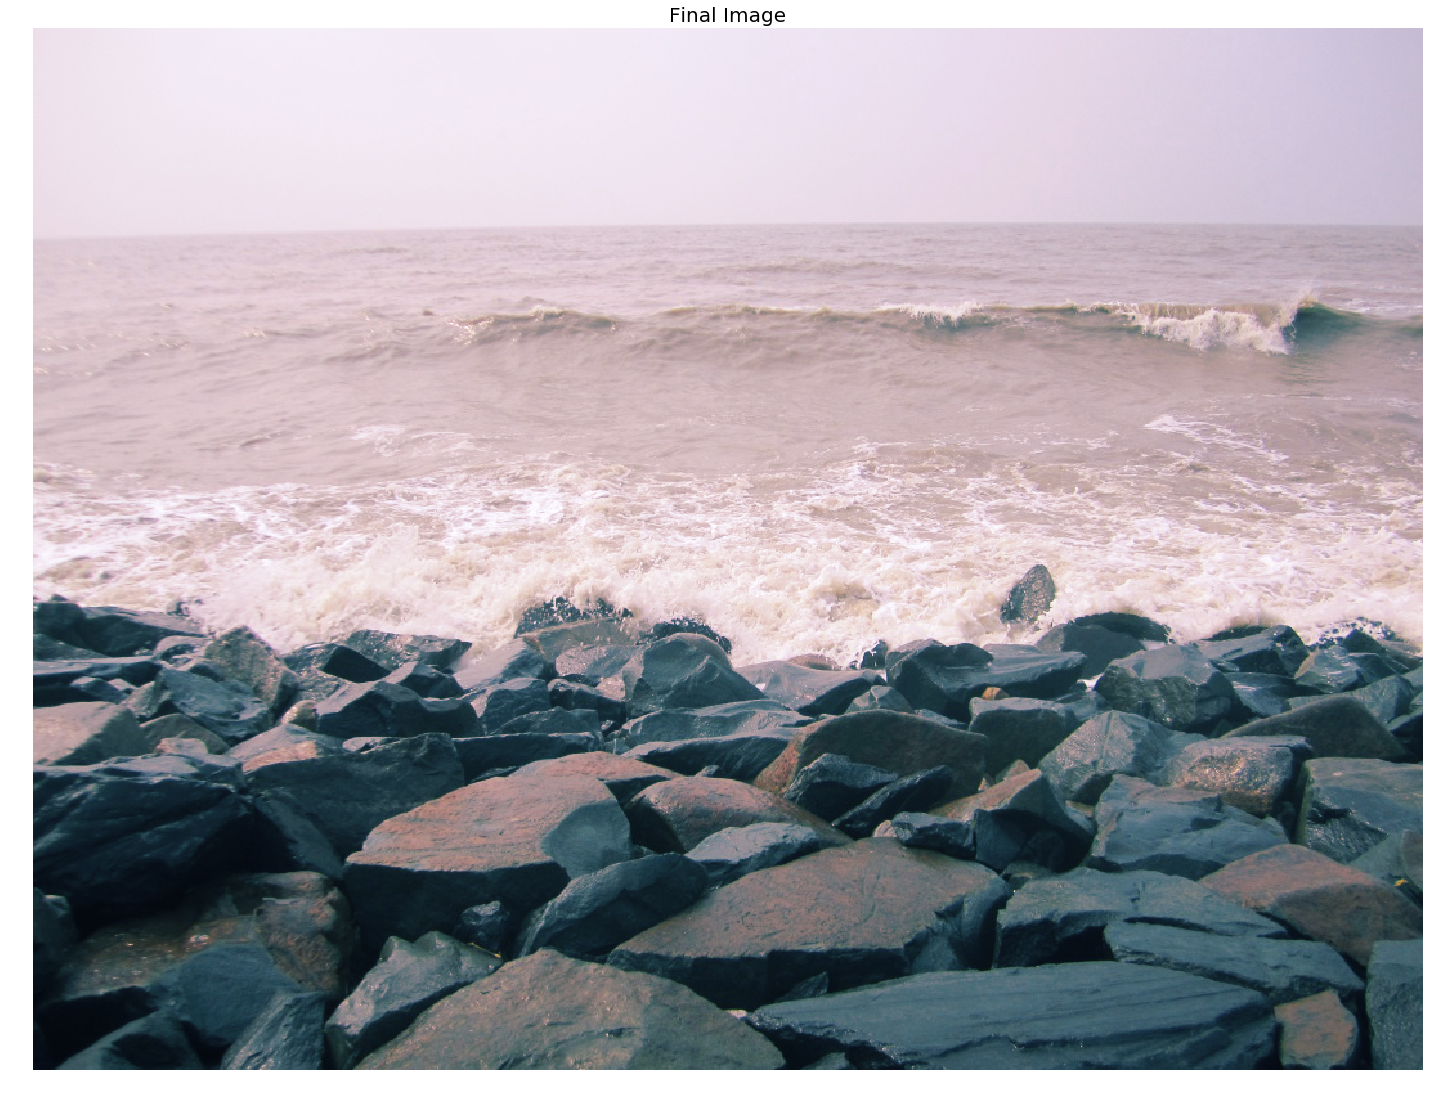

In [15]:
plt.figure(figsize=(20,20))
plt.imshow(im1)
plt.axis('off')
plt.title('Final Image', size=20)
plt.tight_layout()
plt.show()

### Ex. 4: Implement the swirl transformation using warp

(224, 225, 3)


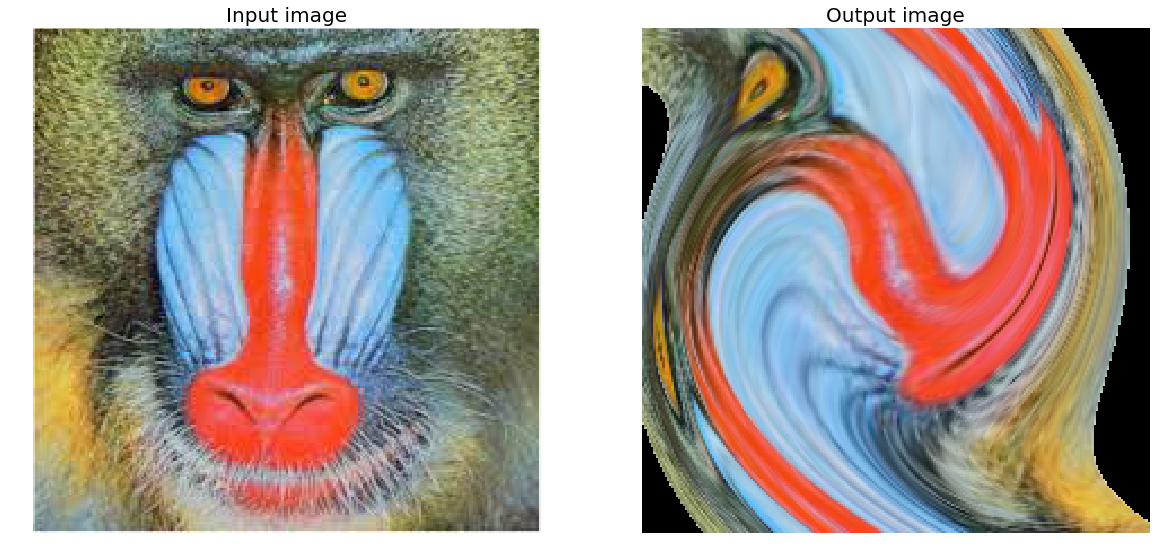

In [26]:
def swirl(xy, x0, y0, R):
    r = np.sqrt((xy[:,1]-x0)**2 + (xy[:,0]-y0)**2)
    a = np.pi*r / R
    xy[:, 1] = (xy[:, 1]-x0)*np.cos(a) + (xy[:, 0]-y0)*np.sin(a) + x0
    xy[:, 0] = -(xy[:, 1]-x0)*np.sin(a) + (xy[:, 0]-y0)*np.cos(a) + y0
    return xy

from skimage.io import imread
from skimage.transform import warp
import matplotlib.pylab as plt
im = imread('images/mandrill.jpg')
print(im.shape)
im1 = warp(im, swirl, map_args={'x0':100, 'y0':100, 'R':250})
plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(im), plt.axis('off'), plt.title('Input image', size=20)
plt.subplot(122), plt.imshow(im1), plt.axis('off'), plt.title('Output image', size=20)
plt.show()

### Ex. 6: Convert a png image with palette to gray scale with PIL

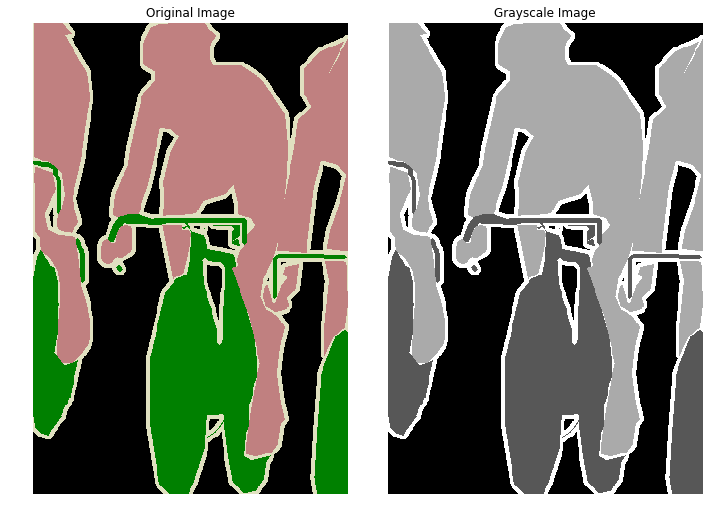

In [32]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def rgb2gray(R, G, B):
    return 0.2989 * R + 0.5870 * G + 0.1140 * B 

img = Image.open('images/bicycle.png') # filename is the png file in question
pal = img.getpalette()     # get the palette

arr = np.zeros((img.height, img.width))
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        idx = img.getpixel((j,i)) # get the index of the pixel in the palette
        R, G, B = pal[3*idx], pal[3*idx+1], pal[3*idx+2] # get the R,G,B values of the pixel
        arr[i,j] = rgb2gray(R, G, B) # convert to grayscale

plt.figure(figsize=(10,8))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(arr, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.tight_layout()
plt.show()

### Ex. 7: Display RGB image color channels in 3D

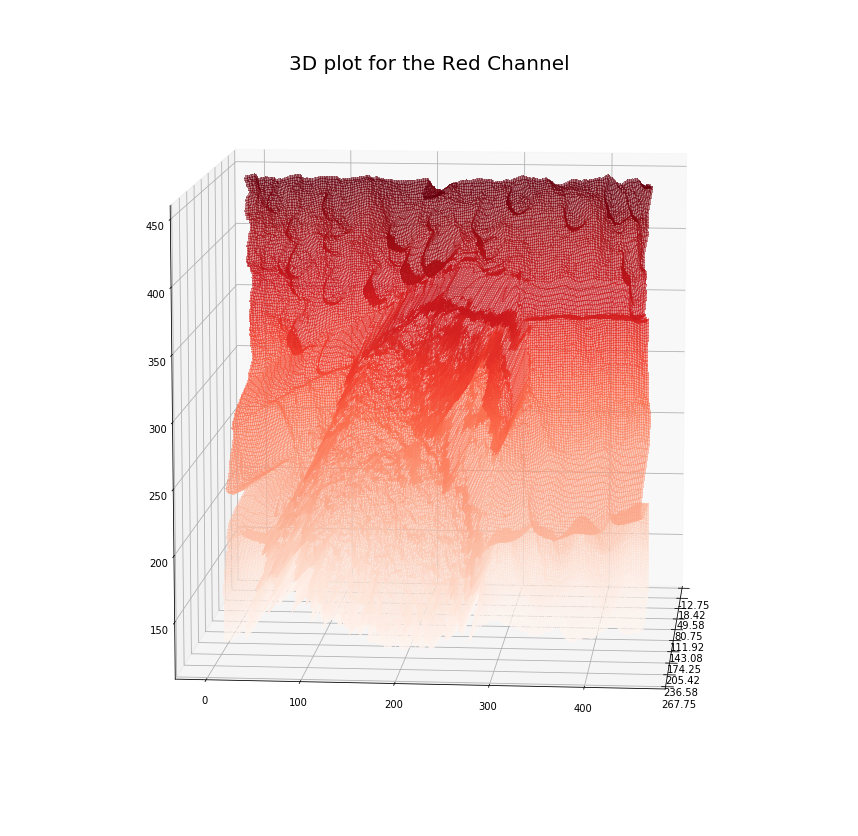

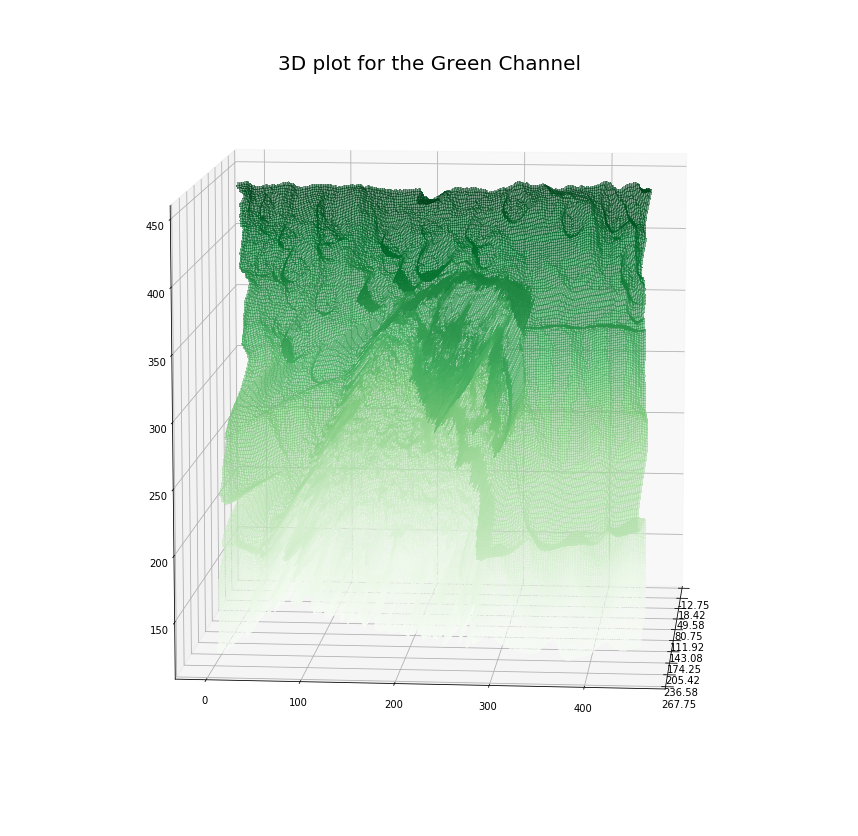

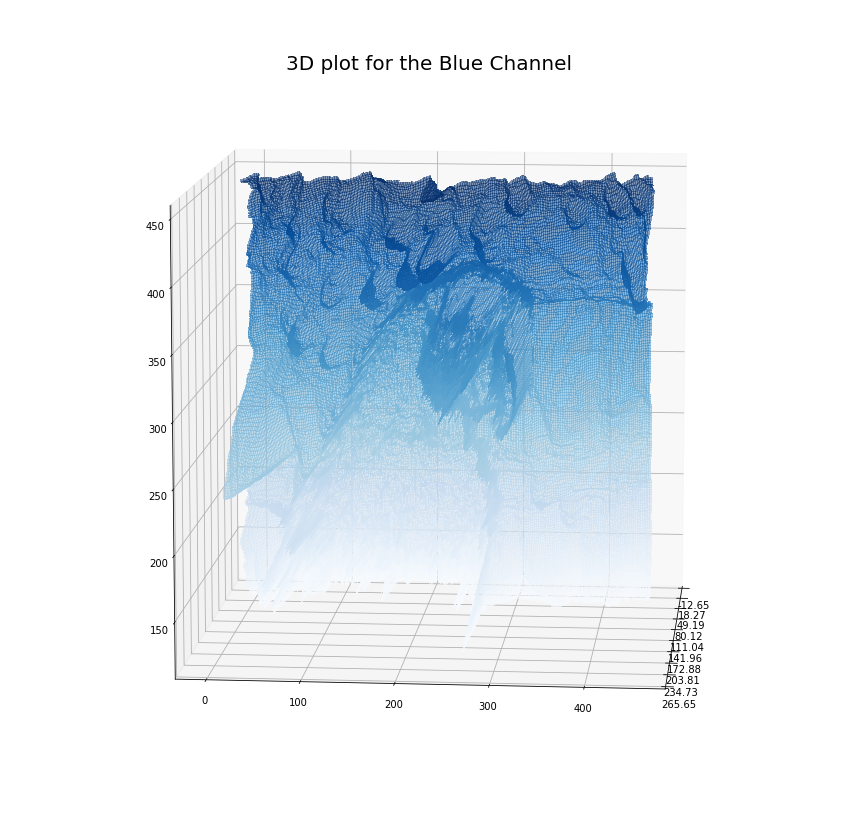

In [34]:
from skimage.io import imread
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def plot_3d(X, Y, Z, cmap='Reds', title=''):
    """
    This function plots 3D visualization of a channel
    It displays (x, y, f(x,y)) for all x,y values
    """ 

    fig = plt.figure(figsize=(15,15))
    ax = fig.gca(projection='3d')
    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cmap, linewidth=0, antialiased=False, rstride=2, cstride=2, alpha=0.5)
    ax.xaxis.set_major_locator(LinearLocator(10))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.view_init(elev=10., azim=5)
    ax.set_title(title, size=20)
    plt.show()
    
# Read the image
im = imread('images/parrot.jpg')
Y = np.arange(im.shape[0])
X = np.arange(im.shape[1])
X, Y = np.meshgrid(X, Y)

Z1 = im[...,0]
Z2 = im[...,1]
Z3 = im[...,2]

# plot 3D visualizations of the R, G, B channels of the image respectively
plot_3d(Z1, X, im.shape[1]-Y, cmap='Reds', title='3D plot for the Red Channel')
plot_3d(Z2, X, im.shape[1]-Y, cmap='Greens', title='3D plot for the Green Channel')
plot_3d(Z3, X, im.shape[1]-Y, cmap='Blues', title='3D plot for the Blue Channel')

### Ex. 8: Image Projection with Homography with scikit-image

(220, 220, 3) (321, 450, 3)


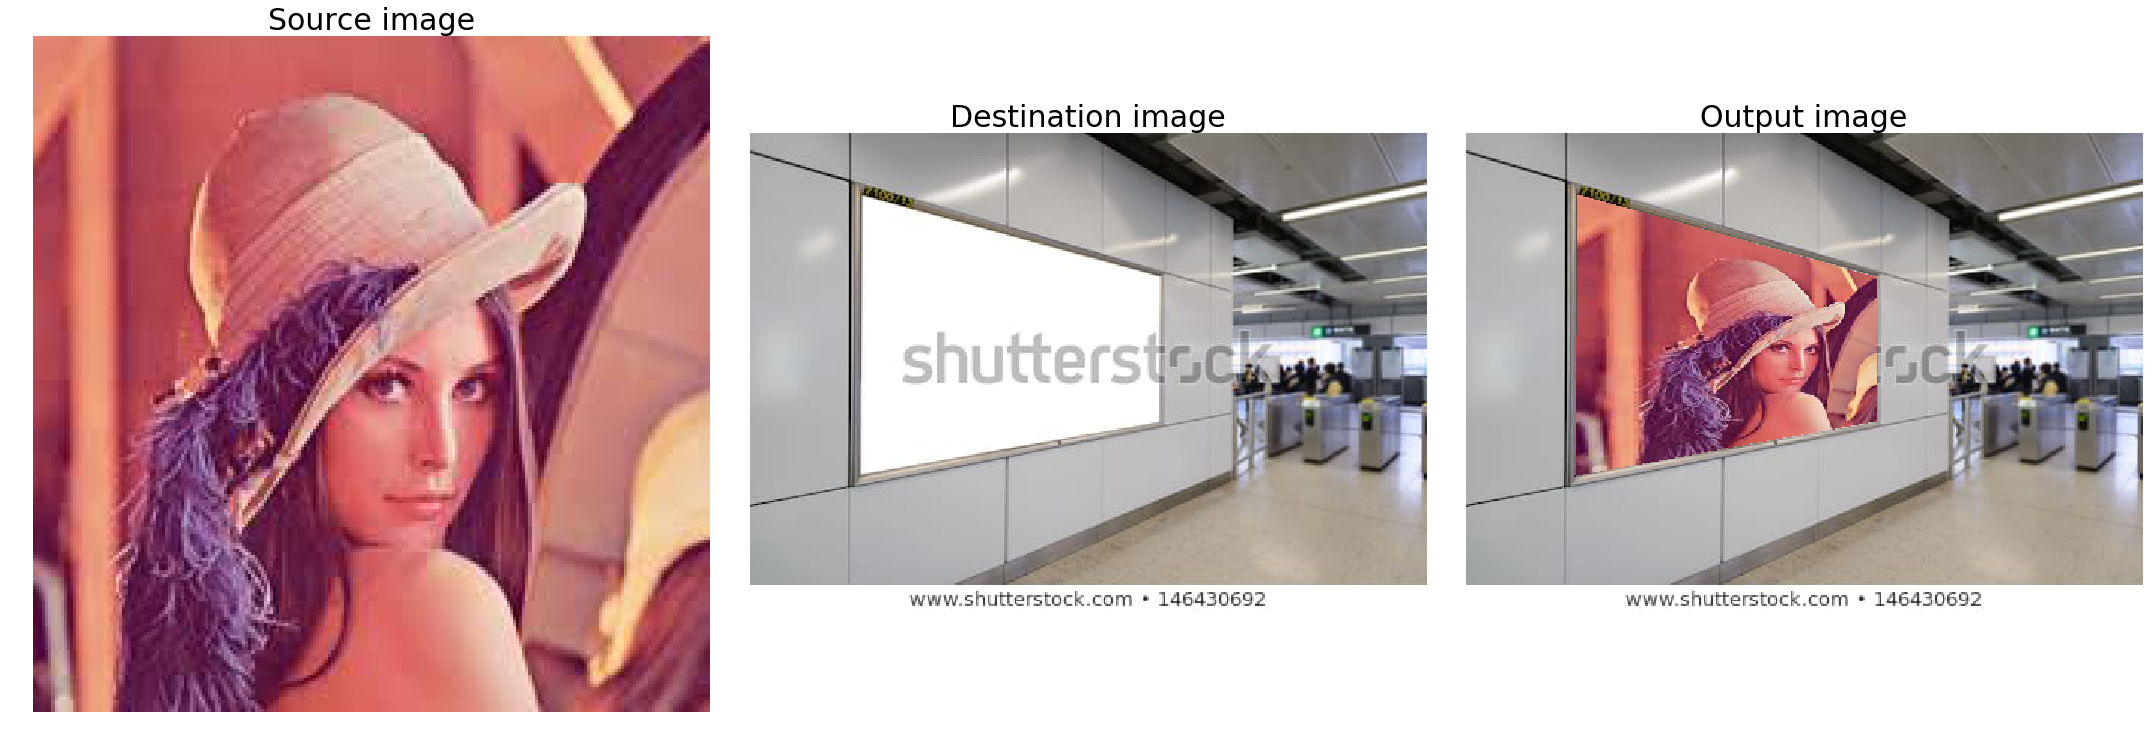

In [35]:
from skimage.transform import ProjectiveTransform
from skimage.io import imread
import numpy as np
import matplotlib.pylab as plt
from matplotlib.path import Path

im_src = imread('images/lena.jpg');
im_dst = imread('images/shutterstock.jpg')
print(im_src.shape, im_dst.shape)

pt = ProjectiveTransform()
width, height = im_src.shape[0], im_src.shape[1]
src = np.array([[   0.,    0.],
       [height-1,    0.],
       [height-1,  width-1],
       [   0.,  width-1]])
dst = np.array([[ 74.,  41.],
       [ 272.,  96.],
       [ 272.,  192.],
       [ 72.,  228.]])

pt.estimate(src, dst)

width, height = im_dst.shape[0], im_dst.shape[1]

polygon = dst
poly_path=Path(polygon)

x, y = np.mgrid[:height, :width]
coors=np.hstack((x.reshape(-1, 1), y.reshape(-1,1))) 

mask = poly_path.contains_points(coors)
mask = mask.reshape(height, width)

dst_indices = np.array([list(x) for x in list(zip(*np.where(mask > 0)))])
#print(dst_indices)
src_indices = np.round(pt.inverse(dst_indices), 0).astype(int)
src_indices[:,0], src_indices[:,1] = src_indices[:,1], src_indices[:,0].copy()
im_out = np.copy(im_dst)
im_out[dst_indices[:,1], dst_indices[:,0]] = im_src[src_indices[:,0], src_indices[:,1]]
plt.figure(figsize=(30,10))
plt.subplot(131), plt.imshow(im_src, cmap='gray'), plt.axis('off'), plt.title('Source image', size=30)
plt.subplot(132), plt.imshow(im_dst, cmap='gray'), plt.axis('off'), plt.title('Destination image', size=30)
plt.subplot(133), plt.imshow(im_out, cmap='gray'), plt.axis('off'), plt.title('Output image', size=30)
plt.tight_layout()
plt.show()